# The spread of true and false news online

Soroush Vosoughi, Deb Roy, Sinan Aral,*

Science  09 Mar 2018: Vol. 359, Issue 6380, pp. 1146-1151
DOI: 10.1126/science.aap9559 https://science.sciencemag.org/content/359/6380/1146.full

- 作业1. False news the spread of true and false news online. The data and code is freely available at https://goo.gl/forms/AKIlZujpexhN7fY33. 


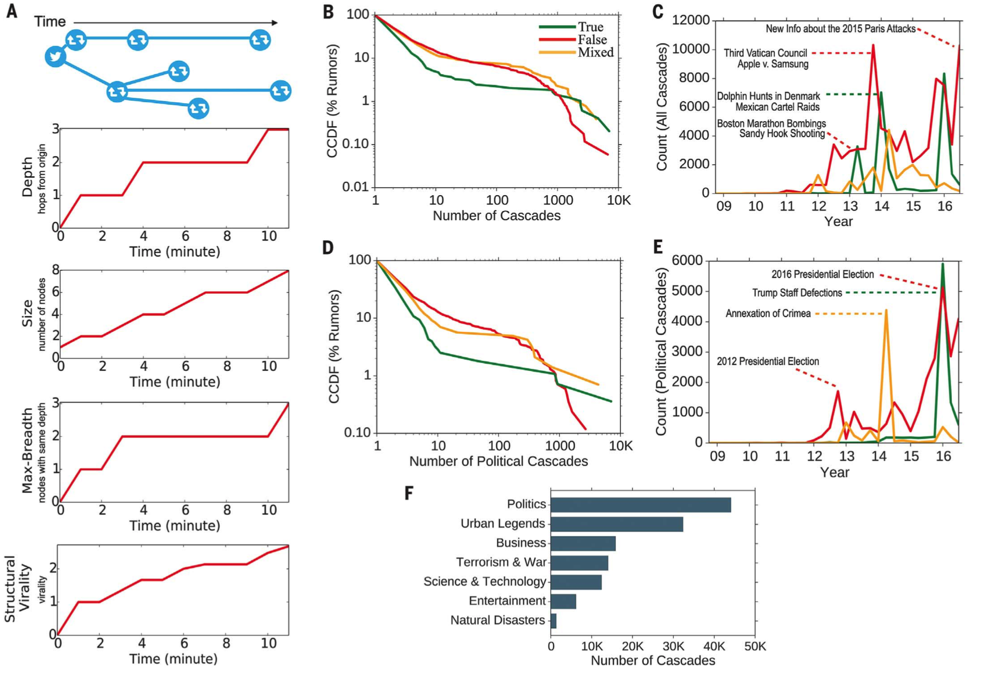

## 任务1. 绘制Figrue 1A
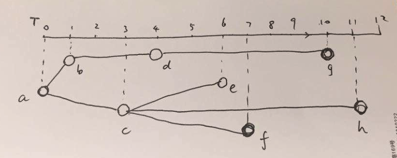

In [6]:
import networkx as nx
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
matplotlib.style.use('ggplot')

alist = [['a', 0], ['a', 'b', 1], ['a', 'c', 3],['b', 'd', 4], 
         ['c', 'e', 6], ['c', 'f', 7], ['d', 'g', 10], ['c', 'h', 11]]

g = nx.Graph()
for i in alist:
    if len(i) == 2:
        n1, t = i
        g.add_node(n1)
    else:
        n1, n2, t = i
        g.add_edge(n1, n2)

pos={'a': np.array([ 0 , 0.5]),
     'b': np.array([ 1,  0.55]),
     'c': np.array([ 3,  0.45]),
     'd': np.array([ 4,  0.55]),
     'e': np.array([ 6,  0.5]),
     'f': np.array([ 7,  0.4]),
     'g': np.array([ 10,  0.55 ]),
     'h': np.array([ 11,  0.45])}

temporal_network = {}
for k in range(1, len(alist)+1):
    elist = alist[:k]
    t = elist[-1][-1]
    temporal_network[t] = nx.Graph()
    for i in elist:
        if len(i) == 2:
            n1 = i[:-1][0]
            temporal_network[t].add_node(n1)
        else:
            n1, n2 = i[:-1]
            temporal_network[t].add_edge(n1, n2)



In [7]:
def calc_size(G):
    num_nodes=G.number_of_nodes()
    return num_nodes

def calc_depth(G,G_root):
    depth=nx.eccentricity(G,v=G_root)
    return depth

def calc_structural_viralty(G):
    size = calc_size(G)
    if size==1:
        return 0 ##virality is not defined for cascades of size 1,
    sv=nx.average_shortest_path_length(G)  #Note: this is very time-consuming for larger cascades
    return sv

def calc_max_breadth(g, root):
    depth = calc_depth(g,root)
    if depth ==0:
        return 0
    else:
        g_in_radius = [len(nx.ego_graph(g, root, radius=i).nodes())-1 for i in range(1, depth+1)]
        breadth_list = [i-g_in_radius[k-1] if k > 0 else i for k, i in enumerate(g_in_radius)]
        return np.max(breadth_list)

ts = list(temporal_network.keys())
t = list(range(np.max(ts)+1))
sizes = [len(temporal_network[i].nodes()) if i in ts else None for i in t]
depths = [calc_depth(temporal_network[i], 'a') if i in ts else None for i in t]
viralty = [calc_structural_viralty(temporal_network[i]) if i in ts else None for i in t]
breadths = [calc_max_breadth(temporal_network[i], 'a') if i in ts else None for i in t]

df  = pd.DataFrame(np.array([t, sizes, depths, breadths, viralty]).T, 
                   columns = ['t', 'size', 'depth', 'breadth', 'viralty'] )
df = df.fillna(method = 'ffill')


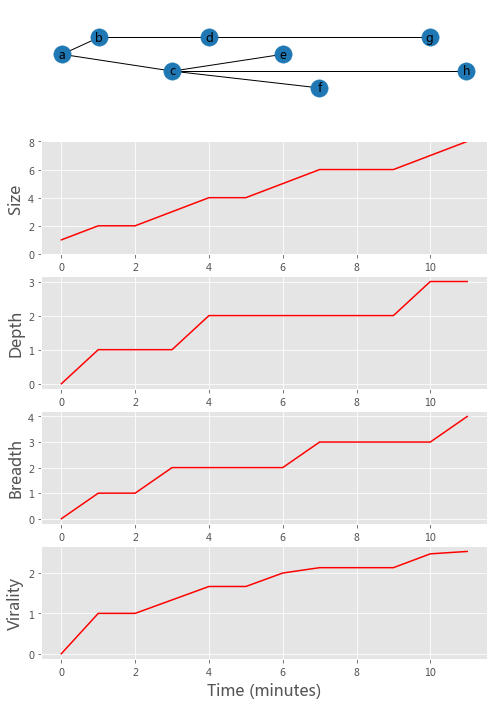

In [5]:
plt.figure(figsize = [8, 12])
plt.subplot(511)
nx.draw(g, with_labels = True, pos = pos)

plt.subplot(512)
plt.plot(df['t'], df['size'], 'r-')
plt.ylabel('Size', fontsize = 16)
plt.ylim([0, 8])

plt.subplot(513)
plt.plot(df['t'], df['depth'], 'r-')
plt.ylabel('Depth', fontsize = 16)

plt.subplot(514)
plt.plot(df['t'], df['breadth'], 'r-')
plt.ylabel('Breadth', fontsize = 16)

plt.subplot(515)
plt.plot(df['t'], df['viralty'], 'r-')
plt.ylabel('Virality', fontsize = 16)
plt.xlabel('Time (minutes)', fontsize = 16)
plt.show()

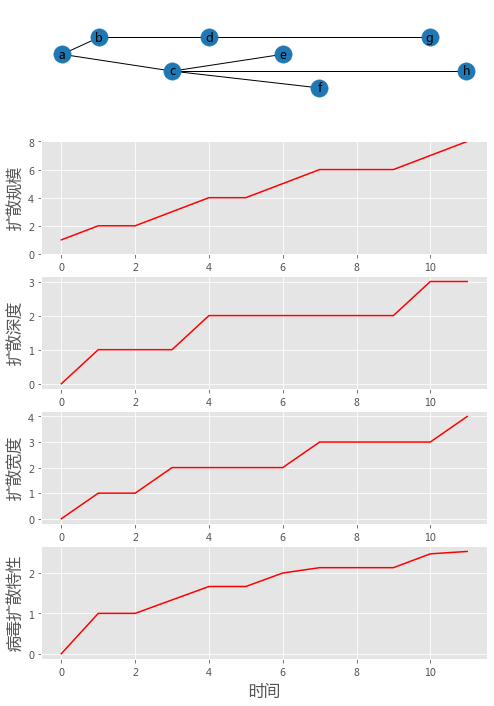

In [8]:
plt.figure(figsize = [8, 12])
plt.subplot(511)
nx.draw(g, with_labels = True, pos = pos)

plt.subplot(512)
plt.plot(df['t'], df['size'], 'r-')
plt.ylabel('扩散规模', fontsize = 16)
plt.ylim([0, 8])

plt.subplot(513)
plt.plot(df['t'], df['depth'], 'r-')
plt.ylabel('扩散深度', fontsize = 16)

plt.subplot(514)
plt.plot(df['t'], df['breadth'], 'r-')
plt.ylabel('扩散宽度', fontsize = 16)

plt.subplot(515)
plt.plot(df['t'], df['viralty'], 'r-')
plt.ylabel('病毒扩散特性', fontsize = 16)
plt.xlabel('时间', fontsize = 16)
plt.show()

## 任务2. 申请Data
https://goo.gl/forms/AKIlZujpexhN7fY33. The entire data set is also available, from the same link, upon signing an access agreement stating that 
- (i) you shall only use the data set for the purpose of validating the results of the MIT study and for no other purpose; 
- (ii) you shall not attempt to identify, reidentify, or otherwise deanonymize the data set; and 
- (iii) you shall not further share, distribute, publish, or otherwise disseminate the data set. 

Those who wish to use the data for any other purposes can contact and make a separate agreement with Twitter.

If you have any questions about the data or the code (or the libraries) please contact me at soroush@mit.edu


### emotions.csv
Has all the emotion data for **Figures 4d and 4f**. Each row contains an tweet_id and the emotional breakdown of the replies.

### topics.csv
Has all the topic data for calculating novelty for Figures 4c and 4e. Each row contains a tweet_id, the rumor_id, the rumor veracity and tweet and background topics.
The tweet and background topics are 200 dimensional vectors.

### raw_data.csv
Has the ananomized raw_data for every single tweet and retweet. It includes infroamtion about user and the propagation path. This data can be used to recreate all cascades.

The parent_id points to the parent of a node. If parent_id is -1, the node is the root node.
Creating and processing the cascades is very time consuming, therefore we have also included the already processed file (see below):

### regression_data.txt
Contains data for the regression model in Figure 4b

### meta_data.txt
Is the processed version of raw_data.csv. **All findings in the paper can be replicated using this file, in conjunction with topics.csv, emotions.csv and regression_data.csv**.

Note that this is not a csv file, this is a text files that is evaluated by python and turned into python objects.

Please note that due to our agreement with Twitter, we have removed all identified bot accounts/activity from the dataset provided

## 任务3. 读取Data


Change the line below


In [2]:
cd '/Users/datalab/bigdata/FalseNews_Code_Data/data/'

/Users/datalab/bigdata/FalseNews_Code_Data/data


In [2]:
ls

emotions_anon.csv         raw_data_anon.csv         topics_anon.csv
metadata_anon.txt         regression_data_anon.txt


In [3]:
raw_data_file='raw_data_anon.csv'
regression_file='regression_data_anon.txt'
metadata_file='metadata_anon.txt'
emotions_file='emotions_anon.csv'
topics_file='topics_anon.csv'

In [32]:
# "Reading metadata..."
with open(metadata_file,'r') as f:
    lines=f.readlines()

cascade_id2metadata={}
for line in lines:
    line=line.replace('\n','').replace('datetime.datetime', '')
    item=eval(line)
    cascade_id2metadata[item[0]]=item[1]


In [74]:
from collections import defaultdict
veracity2number_of_cascades=defaultdict(int)
unique_rumors=set([])
for cascade,metadata in cascade_id2metadata.items():
    veracity=metadata['veracity']
    rid=metadata['rumor_id']
    unique_rumors.add(rid)
    veracity2number_of_cascades[veracity]+=1
# change this line below
print("Number of unique rumors:", )

Number of unique rumors: 2448


In [83]:
# change this line below
print ("Total number of cascades:", )

Total number of cascades: 126301


In [82]:
veracity2number_of_cascades.items()

dict_items([('FALSE', 82605), ('TRUE', 24409), ('MIXED', 19287)])

## Figrue 1B

In [25]:
veracity2color={"TRUE":'green',
        "FALSE":'red',
        'MIXED':'orange'}
category2linestyle={'Politics':'-',
        'Other':'--'}

import sys
epsilon=sys.float_info.epsilon
fs=16 #font size 1
fs_2=16 #font size 2
lw=4 #linewidth for visualization
thresh=2 #threshold for dynamic measures (i.e., there needs to be at least two points for each observation)

In [84]:
veracity2rid2count=defaultdict(lambda: defaultdict(int))
for cascade,metadata in cascade_id2metadata.items():
    veracity=metadata['veracity']
    rid=metadata['rumor_id']
    veracity2rid2count[veracity][rid]+=1

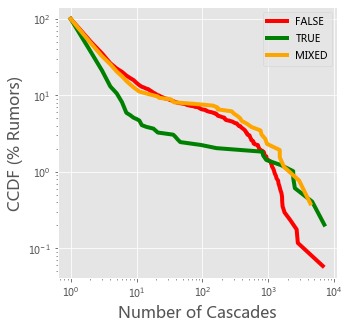

In [110]:
plt.figure(figsize = [5,5])

for veracity,rid2count in veracity2rid2count.items():
    rid_count=list(rid2count.items())
    rid_count.sort(key=lambda x:x[1], reverse=True)
    y=[count for rid,count in rid_count]
    total=float(len(rid_count))
    xf=[]
    pf=[]
    y.sort()
    counts=list(set(y))
    counts.sort()
    for d in counts:
        ind=y.index(d)
        count=len(y[ind:])
        p=(count/float(total)) * 100
        xf.append(d)
        pf.append(p)
    plt.plot(xf,pf,'-',color=veracity2color[veracity],linewidth=lw, label = veracity)
plt.xscale('log')
plt.yscale('log')
plt.xlabel("Number of Cascades",fontsize=16)
plt.ylabel("CCDF (% Rumors)",fontsize=16)
plt.xticks(rotation='horizontal')
plt.legend()
plt.show()

## 任务4. Figure 1D

改写以上Figure 1B的代码绘制Figrue 1D

In [122]:
veracity2rid2count=


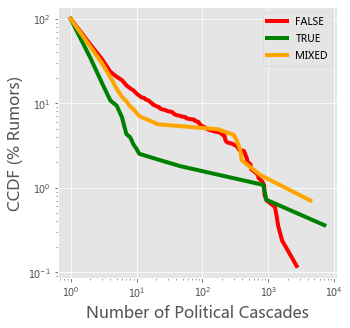

In [124]:
# 绘图


## Figrue 1C


In [119]:
def quarter_year(date):
    if date.month<4:
        daty='01'
    elif date.month<7:
        daty='04'
    elif date.month<10:
        daty='07'
    else:
        daty='10'
    date=str(date.year)+'-'+daty+'-'+'01'
    date = parser.parse(date)
    return date

import dateutil.parser as parser

veracity2date2count=defaultdict(lambda: defaultdict(int))
for cascade,metadata in cascade_id2metadata.items():
    veracity=metadata['veracity']
    y,m,d = metadata['start_date'][:3]
    date=datetime.date(y,m,d)
    date = quarter_year(date)
    veracity2date2count[veracity][date]+=1

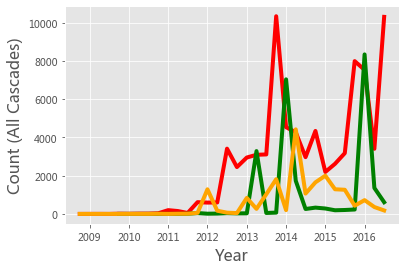

In [121]:
for veracity,date2count in veracity2date2count.items():
    date_count=list(date2count.items())
    date_count.sort(key=lambda x:x[0])
    x=[d for d,c in date_count if (d.year!=2016 or d.month<10)]
    y=[c for d,c in date_count if (d.year!=2016 or d.month<10)]
    plt.plot(x,y,color=veracity2color[veracity],linewidth=lw)
plt.xlabel('Year',fontsize=16)
plt.ylabel("Count (All Cascades)",fontsize=16)
plt.show()

## 任务5. Figrue 1E

改写以上Figure 1B的代码绘制Figrue 1D

In [ ]:
veracity2date2count=


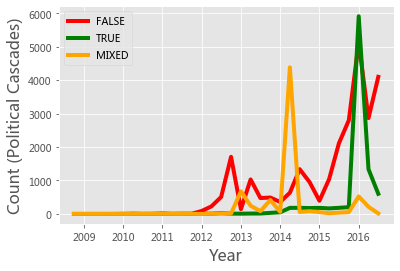

In [126]:
# 绘图


## Figrue 1F

In [128]:
def kit(x, pos):
    val_str = '{:g}'.format(x)
    if val_str=='5000':
        return '5K'
    elif val_str=='15000':
        return '15K'
    elif val_str=='25000':
        return '25K'
    elif val_str=='35000':
        return '35K'
    elif val_str=='45000':
        return '45K'
    elif val_str=='10000':
        return '10K'
    elif val_str=='20000':
        return '20K'
    elif val_str=='30000':
        return '30K'
    elif val_str=='40000':
        return '40K'
    elif val_str=='50000':
        return '50K'
    elif val_str=='60000':
        return '60K'
    elif val_str=='100000':
        return '100K'
    else:
        return val_str

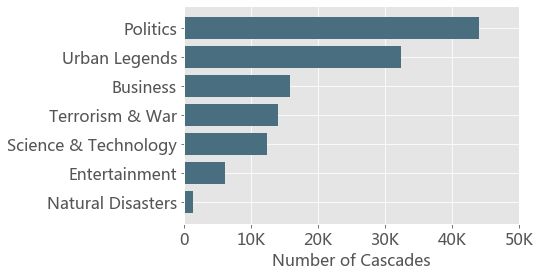

In [131]:
category2count=defaultdict(int)
for cascade,metadata in cascade_id2metadata.items():
    category=metadata['rumor_category']
    category2count[category]+=1
cat_count=list(category2count.items())
cat_count.sort(key=lambda x:x[1], reverse=True)
y=[count for cat,count in cat_count]
x=['Politics','Urban Legends','Business','Terrorism & War',
   'Science & Technology','Entertainment','Natural Disasters']
x.reverse()
y.reverse()
width = 0.015
pos=[ 0.17 , 0.19 , 0.21 , 0.23 , 0.25 , 0.27 , 0.29]
ax = plt.subplot(111)
formatter = plt.FuncFormatter(kit)
ax.xaxis.set_major_formatter(formatter)
ax.barh(pos,y,width, align='center',color ='#486E7F' )
plt.yticks(pos, x,fontsize=fs)
plt.ylim([0.155,0.305])
ax.tick_params(axis='both', which='major', labelsize=16)
plt.xlabel("Number of Cascades",fontsize=16)
plt.xticks(rotation='horizontal')
ax.set_xticks([0, 10000, 20000,30000,40000,50000])
plt.show()

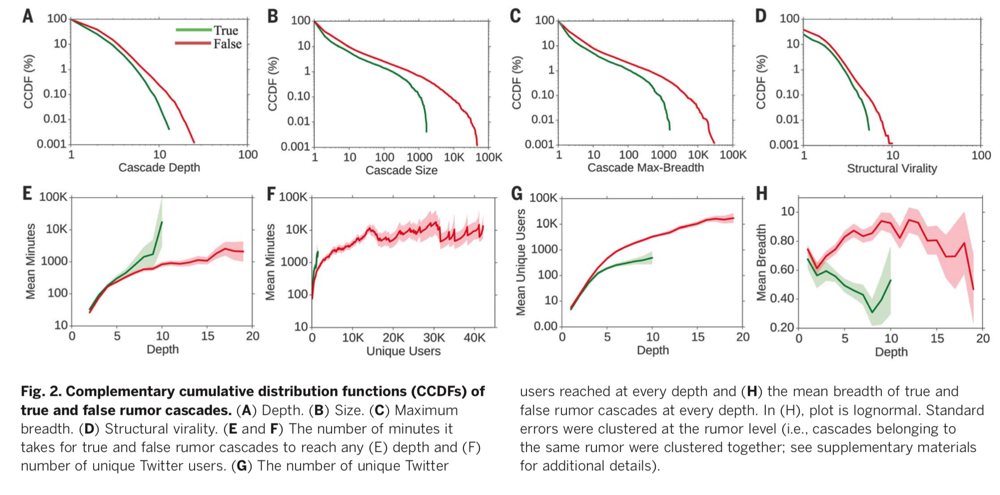

## Figrue 2A

In [132]:
def calc_robust_sem(y_r,clusters):
    '''
    calculated the cluster robust semof array
    '''
    x_r=[1]*len(y_r)
    res = sm.OLS(y_r,x_r).fit(cov_type='cluster',cov_kwds={'groups': clusters})
    robust_sem=res.bse[0]
    return robust_sem

In [135]:
import statsmodels.api as sm
import statsmodels.formula.api as smf
from scipy import stats
from scipy.spatial.distance import cosine

veracity2depths=defaultdict(list)
veracity2clusters=defaultdict(list)
for cascade,metadata in cascade_id2metadata.items():
    veracity=metadata['veracity']
    rid=metadata['rumor_id']
    depth=metadata['depth']+1 #adding one for smoothing purposes
    veracity2depths[veracity].append(depth)
    veracity2clusters[veracity].append(rid)
    
print ('##############################')
print ('Depth Stats. FALSE/TRUE/MIXED')
print ('Mean (log)',np.mean(np.log10(veracity2depths['FALSE'])),
       np.mean(np.log10(veracity2depths['TRUE'])),
       np.mean(np.log10(veracity2depths['MIXED'])) )
print ('Robust SEM (log)',calc_robust_sem(np.log10(veracity2depths['FALSE']),veracity2clusters['FALSE']),\
    calc_robust_sem(np.log10(veracity2depths['TRUE']),veracity2clusters['TRUE']),\
    calc_robust_sem(np.log10(veracity2depths['MIXED']),veracity2clusters['MIXED']) )
print  ("KS test (false and true):",stats.ks_2samp(veracity2depths['FALSE'],veracity2depths['TRUE']))


##############################
Depth Stats. FALSE/TRUE/MIXED
Mean (log) 0.1556960624002555 0.09893083525906188 0.08346135679142731
Robust SEM (log) 0.01349706640914129 0.01829904333101691 0.01712836589458262
KS test (false and true): Ks_2sampResult(statistic=0.13375145004382005, pvalue=3.394074970588714e-293)


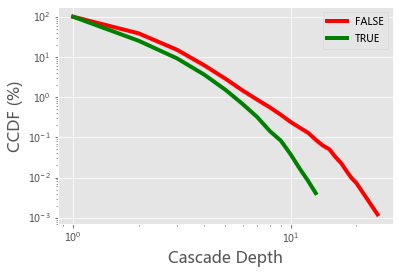

In [141]:
'''
FIGURE 2A
CCDF of depth for all rumors
'''
ax = plt.subplot(111)
ax.set_xscale('log')
ax.set_yscale('log')

for veracity,depths in veracity2depths.items():
    if veracity=='MIXED':
        continue
    total=float(len(depths))
    xf=[]
    pf=[]
    depths.sort()
    counts=list(set(depths))
    counts.sort()
    for d in counts:
        ind=depths.index(d)
        count=len(depths[ind:])
        p=(count/float(total)) * 100
        xf.append(d)
        pf.append(p)
    ax.plot(xf,pf,color=veracity2color[veracity],linewidth=lw, label=veracity)
    
plt.xlabel("Cascade Depth",fontsize=16)
plt.ylabel("CCDF (%)",fontsize=16)
ax.tick_params(axis='both', which='major')
plt.xticks(rotation='horizontal')
plt.legend()
plt.show()

## 任务6： Figrue 2B

改写以上Figure 1B的代码绘制Figrue 1D

In [139]:
# compute veracity2sizes
veracity2sizes=
    
print ('##############################')
print ('Size Stats. FALSE/TRUE/MIXED')
print ('Mean (log)',np.mean(np.log10(veracity2sizes['FALSE'])),
np.mean(np.log10(veracity2sizes['TRUE'])),np.mean(np.log10(veracity2sizes['MIXED'])))
print ('Robust SEM (log)',calc_robust_sem(np.log10(veracity2sizes['FALSE']),veracity2clusters['FALSE']),\
    calc_robust_sem(np.log10(veracity2sizes['TRUE']),veracity2clusters['TRUE']),\
    calc_robust_sem(np.log10(veracity2sizes['MIXED']),veracity2clusters['MIXED']))
print  ("KS test (false and true):",stats.ks_2samp(veracity2sizes['FALSE'],
                                                  veracity2sizes['TRUE']))

##############################
Size Stats. FALSE/TRUE/MIXED
Mean (log) 0.3128844655467964 0.18638413095627063 0.15980231469248984
Robust SEM (log) 0.030545758073239372 0.043060018558943064 0.03644323338242025
KS test (false and true): Ks_2sampResult(statistic=0.13375145004382005, pvalue=3.394074970588714e-293)


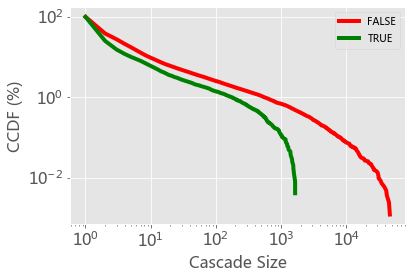

In [142]:
'''
FIGURE 2B
CCDF of size for all rumors
'''


以上任务1到任务6是必须完成的任务，可以参考作者给出的代码。

- 选做（非必选）绘制 Figure 2C-H

- 作业2（选做，非必选）. Henry Farber's (2015) study of the behavior of New York City taxi drivers
 https://www1.nyc.gov/site/tlc/about/tlc-trip-record-data.page 

# This is the end!